In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
pollution = pd.read_excel('PM2.5climate.xlsx')
pollution.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
pollution.shape

(43824, 13)

Because the data have been preprocess, most of the variables will not be changed.
For data cleaning, we will check duplicated and empty variables and then make a decision whether to 
keep, change or drop the variables

In [4]:
print('Total Missing values:', round((pollution['pm2.5'].isnull().sum()/43824)*100,2),'%')

Total Missing values: 4.72 %


As seen in the exploratory data, only one attribute have 2061 missing values, which is 0.047 or 4.7% of the total dataset observations.

---

## Dropping Variables

## Missing Values

In [5]:
pollution.drop(columns = ['No','hour', 'year', 'day'], inplace=True)
pollution.head()

,month,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,1,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,1,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,1,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
pollution.dropna(inplace = True)
pollution.reset_index(drop = True, inplace = True)
pollution.head()

,month,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,1,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,1,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,1,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [7]:
pollution['pm2.5'].isnull().sum()

0

In [8]:
pollution.shape

(41757, 9)

All the missing values have been dropped because, as observed in the exploration, the missing values are in the target variable. If they had not been dropped, that would skew our regression results because it would not give any prediction for the level of pollution.

In addition, the missing values will not overall impact the dataset as it accounts for only 5% total. We chose not to replace the missing values because it was such a small portion of the dataset and replacing it could cause bias and it was a safer option to remove them than replace them.

No. has been dropped because it does not give any information since it is simply the row number of the observation.

Hour was dropped because it is a minute detail in pollution levels and we want to explore larger trends in the level s of pollution. We want to understand the long-run trend in the level of pollution and hour is a very short-term measure.

Similarly, day is also a short-term measure that we are not interested in exploring. 

Year was dropped because in our exploration it was found that it was not correlated with the level fo pollution and, hence, we decided to drop it.

Let us rename the variables for better understanding:

In [9]:
pollution.columns

Index(['month', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')

In [10]:
names = dict(DEWP = 'dewTemp', TEMP = 'temp', PRES = 'pres', cbwd = 'windDir',
             Iws = 'windSpeed', Is = 'cumSnow', Ir = 'cumRain')
pollution.rename(columns = names, inplace = True)
pollution.columns

Index(['month', 'pm2.5', 'dewTemp', 'temp', 'pres', 'windDir', 'windSpeed',
       'cumSnow', 'cumRain'],
      dtype='object')

In [11]:
pollution['windDir'].replace({'cv':'SW'}, inplace = True)
pollution['windDir'].value_counts()

SE    14573
NW    13484
SW     8944
NE     4756
Name: windDir, dtype: int64

#### About the project

The next step will be exploring the outliers in the dataset.
First part of this visualization will be shown with outliers included and the second part the visualizations will be plotted after removing outleirs. 

For the data analysis, there will be two regression models shown. The first model will be the model with outliers and the second model is after removing outliers. Towards the end, we will be comparing both models and see which one is most reliable model to be used for the predictions


---

## Outliers

In [12]:
from scipy import stats
import numpy as np

z2 = np.abs(stats.zscore(pollution[['month', 'pm2.5', 'dewTemp', 'temp', 'pres', 'windSpeed', 'cumSnow', 'cumRain']]))
print(z2)

[[1.59626706 0.3301143  1.22979123 ... 0.4449441  0.07105723 0.13740842]
 [1.59626706 0.53652547 1.16050789 ... 0.42700666 0.07105723 0.13740842]
 [1.59626706 0.65602667 0.88337455 ... 0.40906923 0.07105723 0.13740842]
 ...
 [1.58830091 0.96267141 1.64549124 ... 4.41045788 0.07105723 0.13740842]
 [1.58830091 0.9843989  1.64549124 ... 4.49147866 0.07105723 0.13740842]
 [1.58830091 0.94094391 1.57620791 ... 4.55456201 0.07105723 0.13740842]]


In [13]:
threshold = 3
print(np.where(z2 > 3))

(array([    5,     6,    23, ..., 41754, 41755, 41756]), array([6, 6, 6, ..., 5, 5, 5]))


In [14]:
outliers2 = pollution[(z2 >=3)]
outliers2

,month,pm2.5,dewTemp,temp,pres,windDir,windSpeed,cumSnow,cumRain
5,1,109.0,-7,-6.0,1022.0,SE,7.14,3,0
6,1,105.0,-7,-6.0,1023.0,SE,8.93,4,0
23,1,126.0,-8,-6.0,1027.0,SE,55.43,3,0
24,1,90.0,-7,-6.0,1027.0,SE,58.56,4,0
25,1,63.0,-8,-6.0,1026.0,SE,61.69,5,0
...,...,...,...,...,...,...,...,...,...
41752,12,8.0,-23,-2.0,1034.0,NW,231.97,0,0
41753,12,10.0,-22,-3.0,1034.0,NW,237.78,0,0
41754,12,10.0,-22,-3.0,1034.0,NW,242.70,0,0
41755,12,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [15]:
pd.set_option('display.max_rows', 1000)
other2 = pollution[(z2 < 3).all(axis=1)]
other2

,month,pm2.5,dewTemp,temp,pres,windDir,windSpeed,cumSnow,cumRain
0,1,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,1,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,1,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,1,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
41740,12,8.0,-22,-5.0,1034.0,NW,143.03,0,0
41741,12,8.0,-22,-5.0,1034.0,NW,150.18,0,0
41742,12,8.0,-22,-3.0,1034.0,NW,155.99,0,0
41743,12,7.0,-22,-2.0,1034.0,NW,163.14,0,0


The first table shows the values of the outliers and the second table shows the values of the dataset without the outliers. Looking at these values, we can see that the values of cumSnow and cumRain are the same for both tables (outliers and non-outliers). We do not see a reason to find z-scores of these two columns since their values are close and removing them based on their z-scores would be unreasonable causing some bias. 

Hence, let us find outliers based on the z-scores of all numerical features except cumSnow and cumRain.

In [16]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(pollution[['month', 'pm2.5', 'dewTemp', 'temp', 'pres', 'windSpeed']]))
print(z)

[[1.59626706 0.3301143  1.22979123 1.34714315 0.3453295  0.4449441 ]
 [1.59626706 0.53652547 1.16050789 1.34714315 0.3453295  0.42700666]
 [1.59626706 0.65602667 0.88337455 1.4292782  0.44241114 0.40906923]
 ...
 [1.58830091 0.96267141 1.64549124 1.26500809 1.70447242 4.41045788]
 [1.58830091 0.9843989  1.64549124 1.34714315 1.70447242 4.49147866]
 [1.58830091 0.94094391 1.57620791 1.26500809 1.70447242 4.55456201]]


In [17]:
threshold = 3
print(np.where(z > 3))

(array([   68,    69,    70, ..., 41754, 41755, 41756]), array([5, 5, 5, ..., 5, 5, 5]))


In [18]:
outliers = pollution[(z >=3)]
outliers.shape

(1878, 9)

In [19]:
pd.set_option('display.max_rows', 1000)
other = pollution[(z < 3).all(axis=1)]
other

,month,pm2.5,dewTemp,temp,pres,windDir,windSpeed,cumSnow,cumRain
0,1,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,1,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,1,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,1,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
41740,12,8.0,-22,-5.0,1034.0,NW,143.03,0,0
41741,12,8.0,-22,-5.0,1034.0,NW,150.18,0,0
41742,12,8.0,-22,-3.0,1034.0,NW,155.99,0,0
41743,12,7.0,-22,-2.0,1034.0,NW,163.14,0,0


Let us create a new dataframe without the outliers:

In [20]:
pollution.shape

(41757, 9)

In [21]:
pollution2 = pollution[(z < 3).all(axis=1)]
pollution2.shape

(39879, 9)

In [22]:
pollution2.reset_index(drop = True, inplace = True)
pollution2.head(10)

,month,pm2.5,dewTemp,temp,pres,windDir,windSpeed,cumSnow,cumRain
0,1,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,1,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,1,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,1,138.0,-7,-5.0,1022.0,SE,6.25,2,0
5,1,109.0,-7,-6.0,1022.0,SE,7.14,3,0
6,1,105.0,-7,-6.0,1023.0,SE,8.93,4,0
7,1,124.0,-7,-5.0,1024.0,SE,10.72,0,0
8,1,120.0,-8,-6.0,1024.0,SE,12.51,0,0
9,1,132.0,-7,-5.0,1025.0,SE,14.30,0,0


Removing outliers based on numerical features, except cumSnow and cumRain, results in fewer outliers being removed; approximately 2,000 rows have not been removed compared to the rows removed when cumSnow and cumRain were used in z-score calculations. This is interesting because it shows that values that are not much different from other observations can be removed due to minor differences. Hence, it is important to look at the outliers to determine if they should be removed for further model creation.

In [23]:
print('The data frame without outliers is', round((pollution2.shape[0]/pollution.shape[0]),2),\
      '% smaller than the original dataframe')

The data frame without outliers is 0.96 % smaller than the original dataframe


---

## One-Hot Encoding

Let us one-hot encode the windDir variable since it is categorical. 

We have to one-hot encode this variable because it has string values and we will give 0, 1 values to each value of the variable.

##### Dataset with Outliers

In [24]:
from sklearn.preprocessing import OneHotEncoder

windDirection = OneHotEncoder()
windDirectionDF = windDirection.fit_transform(pollution[['windDir']])
windDirectionDF = pd.DataFrame(windDirectionDF.toarray())
windDirectionDF.columns = windDirection.get_feature_names()
windDirectionDF.head()

,x0_NE,x0_NW,x0_SE,x0_SW
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [25]:
pollution.drop(columns = ['windDir'], inplace = True)
pollution.head()

,month,pm2.5,dewTemp,temp,pres,windSpeed,cumSnow,cumRain
0,1,129.0,-16,-4.0,1020.0,1.79,0,0
1,1,148.0,-15,-4.0,1020.0,2.68,0,0
2,1,159.0,-11,-5.0,1021.0,3.57,0,0
3,1,181.0,-7,-5.0,1022.0,5.36,1,0
4,1,138.0,-7,-5.0,1022.0,6.25,2,0


In [26]:
pollutionDF = pd.concat([pollution, windDirectionDF], axis = 1)
pollutionDF.head()

,month,pm2.5,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW
0,1,129.0,-16,-4.0,1020.0,1.79,0,0,0.0,0.0,1.0,0.0
1,1,148.0,-15,-4.0,1020.0,2.68,0,0,0.0,0.0,1.0,0.0
2,1,159.0,-11,-5.0,1021.0,3.57,0,0,0.0,0.0,1.0,0.0
3,1,181.0,-7,-5.0,1022.0,5.36,1,0,0.0,0.0,1.0,0.0
4,1,138.0,-7,-5.0,1022.0,6.25,2,0,0.0,0.0,1.0,0.0


In [27]:
pollutionDF.columns

Index(['month', 'pm2.5', 'dewTemp', 'temp', 'pres', 'windSpeed', 'cumSnow',
       'cumRain', 'x0_NE', 'x0_NW', 'x0_SE', 'x0_SW'],
      dtype='object')

In [28]:
colnames = ['month', 'dewTemp', 'temp', 'pres', 'windSpeed', 'cumSnow', 'cumRain', 'x0_NE', 'x0_NW', 'x0_SE', 'x0_SW', 'pm2.5']
pollutionDF = pollutionDF[colnames]
pollutionDF.head()

,month,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW,pm2.5
0,1,-16,-4.0,1020.0,1.79,0,0,0.0,0.0,1.0,0.0,129.0
1,1,-15,-4.0,1020.0,2.68,0,0,0.0,0.0,1.0,0.0,148.0
2,1,-11,-5.0,1021.0,3.57,0,0,0.0,0.0,1.0,0.0,159.0
3,1,-7,-5.0,1022.0,5.36,1,0,0.0,0.0,1.0,0.0,181.0
4,1,-7,-5.0,1022.0,6.25,2,0,0.0,0.0,1.0,0.0,138.0


---

##### Dataset without Outliers

In [29]:
windDirection_wo = OneHotEncoder()
windDirection_woDF = windDirection_wo.fit_transform(pollution2[['windDir']])
windDirection_woDF = pd.DataFrame(windDirection_woDF.toarray())
windDirection_woDF.columns = windDirection_wo.get_feature_names()
windDirection_woDF.head()

,x0_NE,x0_NW,x0_SE,x0_SW
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [30]:
pollution2.drop(columns = ['windDir'], inplace = True)
pollution2.head()

/Users/sneha_verma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,month,pm2.5,dewTemp,temp,pres,windSpeed,cumSnow,cumRain
0,1,129.0,-16,-4.0,1020.0,1.79,0,0
1,1,148.0,-15,-4.0,1020.0,2.68,0,0
2,1,159.0,-11,-5.0,1021.0,3.57,0,0
3,1,181.0,-7,-5.0,1022.0,5.36,1,0
4,1,138.0,-7,-5.0,1022.0,6.25,2,0


In [31]:
pollution2DF = pd.concat([pollution2, windDirection_woDF], axis = 1)
pollution2DF.head()

,month,pm2.5,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW
0,1,129.0,-16,-4.0,1020.0,1.79,0,0,0.0,0.0,1.0,0.0
1,1,148.0,-15,-4.0,1020.0,2.68,0,0,0.0,0.0,1.0,0.0
2,1,159.0,-11,-5.0,1021.0,3.57,0,0,0.0,0.0,1.0,0.0
3,1,181.0,-7,-5.0,1022.0,5.36,1,0,0.0,0.0,1.0,0.0
4,1,138.0,-7,-5.0,1022.0,6.25,2,0,0.0,0.0,1.0,0.0


In [32]:
colnames = ['month', 'dewTemp', 'temp', 'pres', 'windSpeed', 'cumSnow', 'cumRain', 'x0_NE', 'x0_NW', 'x0_SE', 'x0_SW', 'pm2.5']
pollution2DF = pollution2DF[colnames]
pollution2DF.head()

,month,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW,pm2.5
0,1,-16,-4.0,1020.0,1.79,0,0,0.0,0.0,1.0,0.0,129.0
1,1,-15,-4.0,1020.0,2.68,0,0,0.0,0.0,1.0,0.0,148.0
2,1,-11,-5.0,1021.0,3.57,0,0,0.0,0.0,1.0,0.0,159.0
3,1,-7,-5.0,1022.0,5.36,1,0,0.0,0.0,1.0,0.0,181.0
4,1,-7,-5.0,1022.0,6.25,2,0,0.0,0.0,1.0,0.0,138.0


In [33]:
pollution2DF.shape

(39879, 12)

In [34]:
pollutionDF.shape

(41757, 12)

After one-hot encoding the variables for the datasets with and without outliers, it can be seen that the number of observations in both the dataframes have remained the same. However, the number of columns have increased because of the one-hot encoded columns.

---

## Visualizations
##### Scatterplot

Let us explore if there are any outliers in this dataset with scatterplot:

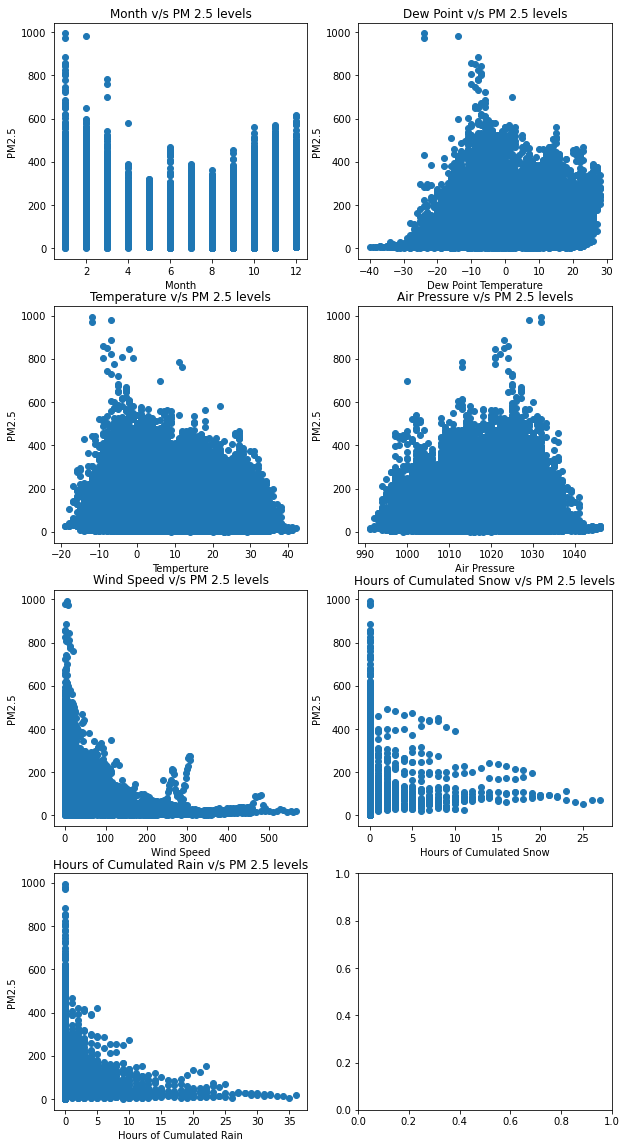

In [37]:
fig, ax = plt.subplots(4, 2, figsize = (10, 20))
#fig.tight_layout()

ax[0,0].scatter(y = pollution['pm2.5'], x = pollution['month'])
ax[0,0].set_xlabel('Month')
ax[0,0].set_ylabel('PM2.5')
ax[0,0].set_title('Month v/s PM 2.5 levels')

ax[0, 1].scatter(y = pollution['pm2.5'], x = pollution['dewTemp'])
ax[0, 1].set_xlabel('Dew Point Temperature')
ax[0, 1].set_ylabel('PM2.5')
ax[0, 1].set_title('Dew Point v/s PM 2.5 levels')

ax[1,0].scatter(y = pollution['pm2.5'], x = pollution['temp'])
ax[1,0].set_xlabel('Temperture')
ax[1,0].set_ylabel('PM2.5')
ax[1,0].set_title('Temperature v/s PM 2.5 levels')

ax[1,1].scatter(y = pollution['pm2.5'], x = pollution['pres'])
ax[1,1].set_xlabel('Air Pressure')
ax[1,1].set_ylabel('PM2.5')
ax[1,1].set_title('Air Pressure v/s PM 2.5 levels')

ax[2,0].scatter(y = pollution['pm2.5'], x = pollution['windSpeed'])
ax[2,0].set_xlabel('Wind Speed')
ax[2,0].set_ylabel('PM2.5')
ax[2,0].set_title('Wind Speed v/s PM 2.5 levels')

ax[2,1].scatter(y = pollution['pm2.5'], x = pollution['cumSnow'])
ax[2,1].set_xlabel('Hours of Cumulated Snow')
ax[2,1].set_ylabel('PM2.5')
ax[2,1].set_title('Hours of Cumulated Snow v/s PM 2.5 levels')

ax[3,0].scatter(y = pollution['pm2.5'], x = pollution['cumRain'])
ax[3,0].set_xlabel('Hours of Cumulated Rain')
ax[3,0].set_ylabel('PM2.5')
ax[3,0].set_title('Hours of Cumulated Rain v/s PM 2.5 levels')

plt.show()

Looking at the above dashboard, it is visible that there are a few outliers in the month, dew point, temperature, and air pressure variables. This is because there are a few points that have much higher pm2.5 levels for certain x-values. This shows that there are certain observations where there are exceptionally high levels of air pollution for a certain month in a year. Similarly, there are certain temperature, dew point temperature, and air pressure values for which there are exceptionally high air pollution levels. These high values of air pollution are probably influenced by external factors that were not controlled in this dataset. Hence, it is probably better to remove any outliers. However, let us see how many outliers there are in totality.

The scatterplots of the wind speed, cumulated hours fo snow and rain are interesting because they follow a 'L' pattern because of which it is hard to distinguish if there are outliers. However, outliers in these variables will be able to be seen with the z-value calculations.


##### Boxplots


#### Box plot with outliers

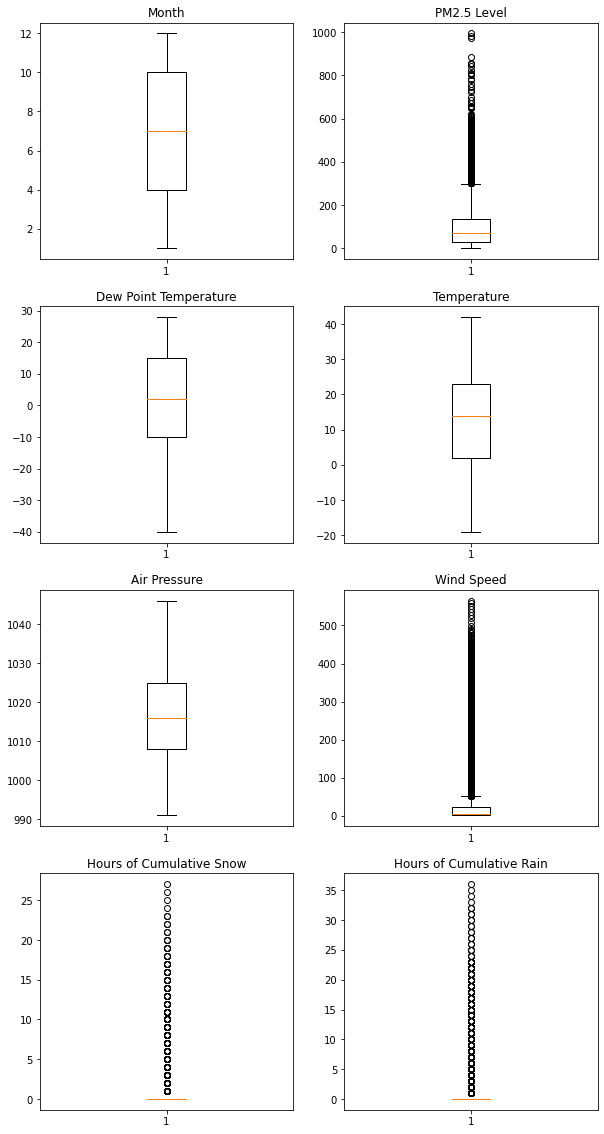

In [38]:
fig, ax = plt.subplots(4, 2, figsize = (10, 20))
ax[0,0].boxplot(x=pollution['month'])
ax[0,0].set_title('Month')

ax[0,1].boxplot(x=pollution['pm2.5'])
ax[0,1].set_title('PM2.5 Level')

ax[1,0].boxplot(x=pollution['dewTemp'])
ax[1,0].set_title('Dew Point Temperature')

ax[1,1].boxplot(x=pollution['temp'])
ax[1,1].set_title('Temperature')

ax[2,0].boxplot(x=pollution['pres'])
ax[2,0].set_title('Air Pressure') 

ax[2,1].boxplot(x=pollution['windSpeed'])
ax[2,1].set_title('Wind Speed') 

ax[3,0].boxplot(x=pollution['cumSnow'])
ax[3,0].set_title('Hours of Cumulative Snow') 

ax[3,1].boxplot(x=pollution['cumRain'])
ax[3,1].set_title('Hours of Cumulative Rain') 

plt.show()

The boxplot above are before the outliers were removed. 

There are four variables that does not seem to show outliers, these variables are month, dew point temperature, temperature and air pressure. Although they seem to not have outliers, they do have some skewness which might indicate some higher-than-normal values.

### Visualizations
##### Scatterplot with outliers removed

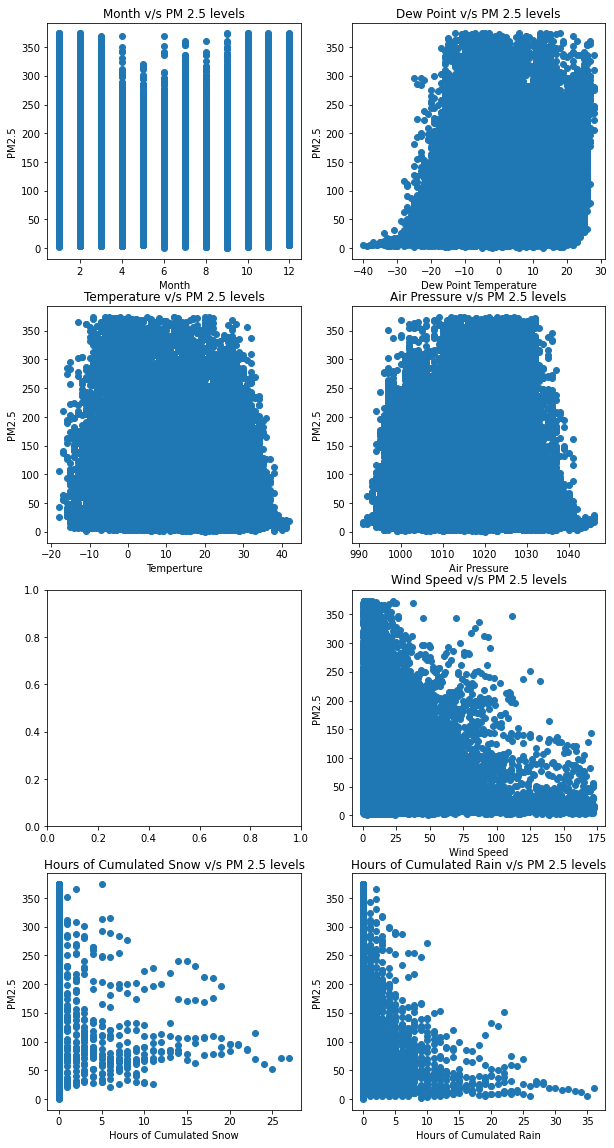

In [39]:
fig, ax = plt.subplots(4, 2, figsize = (10, 20))
#fig.tight_layout()

ax[0,0].scatter(y = pollution2['pm2.5'], x = pollution2['month'])
ax[0,0].set_xlabel('Month')
ax[0,0].set_ylabel('PM2.5')
ax[0,0].set_title('Month v/s PM 2.5 levels')

ax[0, 1].scatter(y = pollution2['pm2.5'], x = pollution2['dewTemp'])
ax[0, 1].set_xlabel('Dew Point Temperature')
ax[0, 1].set_ylabel('PM2.5')
ax[0, 1].set_title('Dew Point v/s PM 2.5 levels')

ax[1,0].scatter(y = pollution2['pm2.5'], x = pollution2['temp'])
ax[1,0].set_xlabel('Temperture')
ax[1,0].set_ylabel('PM2.5')
ax[1,0].set_title('Temperature v/s PM 2.5 levels')

ax[1,1].scatter(y = pollution2['pm2.5'], x = pollution2['pres'])
ax[1,1].set_xlabel('Air Pressure')
ax[1,1].set_ylabel('PM2.5')
ax[1,1].set_title('Air Pressure v/s PM 2.5 levels')

ax[2,1].scatter(y = pollution2['pm2.5'], x = pollution2['windSpeed'])
ax[2,1].set_xlabel('Wind Speed')
ax[2,1].set_ylabel('PM2.5')
ax[2,1].set_title('Wind Speed v/s PM 2.5 levels')

ax[3,0].scatter(y = pollution2['pm2.5'], x = pollution2['cumSnow'])
ax[3,0].set_xlabel('Hours of Cumulated Snow')
ax[3,0].set_ylabel('PM2.5')
ax[3,0].set_title('Hours of Cumulated Snow v/s PM 2.5 levels')

ax[3,1].scatter(y = pollution2['pm2.5'], x = pollution2['cumRain'])
ax[3,1].set_xlabel('Hours of Cumulated Rain')
ax[3,1].set_ylabel('PM2.5')
ax[3,1].set_title('Hours of Cumulated Rain v/s PM 2.5 levels')

plt.show()

The scatterplot above is visualizing the dataset after the outliers are removed. Due to the large dataset, the plot in the dataset seem to be cluster and does not appears to show linear correlation between variables

The graph between Temperature v/s PM2.5 level and the Air Pressure v/s PM2.5 level appears to be very interesting as they seem to follow the same pattern. Both are clustered in the middle. While the Wind Speed v/s PM 2.5 Level appears to cluster more to the left and the Dew Point v/s PM2.5 Level are the opposite, it clusters more to the left


#### Box plot with outliers removed

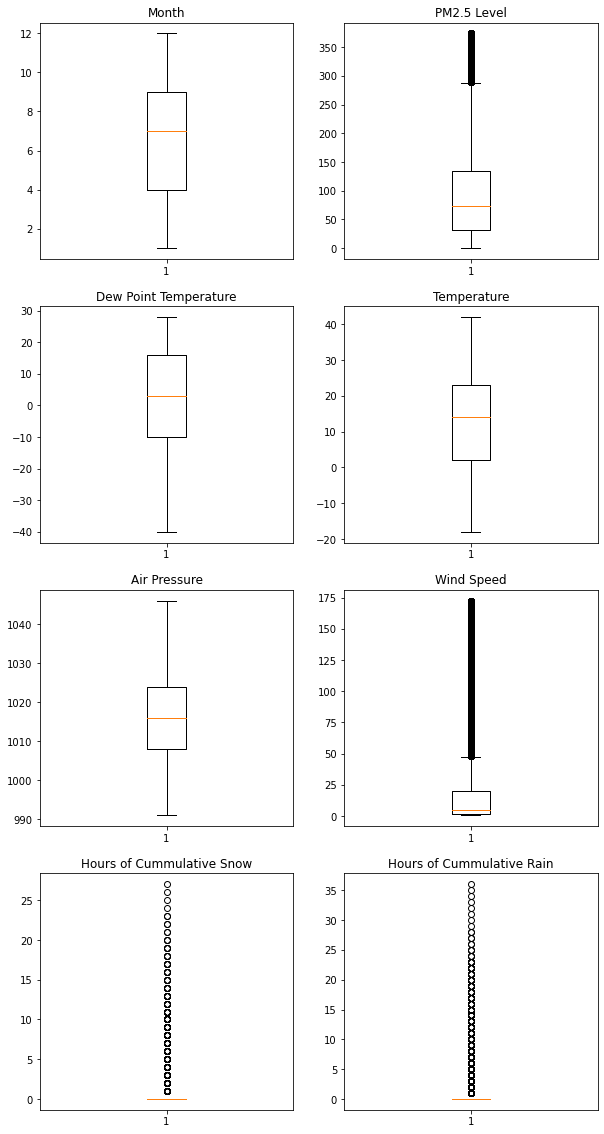

In [41]:
fig, ax = plt.subplots(4, 2, figsize = (10, 20))
ax[0,0].boxplot(x=pollution2['month'])
ax[0,0].set_title('Month')

ax[0,1].boxplot(x=pollution2['pm2.5'])
ax[0,1].set_title('PM2.5 Level')

ax[1,0].boxplot(x=pollution2['dewTemp'])
ax[1,0].set_title('Dew Point Temperature')

ax[1,1].boxplot(x=pollution2['temp'])
ax[1,1].set_title('Temperature')

ax[2,0].boxplot(x=pollution2['pres'])
ax[2,0].set_title('Air Pressure') 

ax[2,1].boxplot(x=pollution2['windSpeed'])
ax[2,1].set_title('Wind Speed') 

ax[3,0].boxplot(x=pollution2['cumSnow'])
ax[3,0].set_title('Hours of Cummulative Snow') 

ax[3,1].boxplot(x=pollution2['cumRain'])
ax[3,1].set_title('Hours of Cummulative Rain') 

plt.show()

The boxplot above are after the ouliers removed. Similar to the previous boxplot with outlier the variables month, dew point temperature, temperature and air pressure still does not show any outliers. 

There are some variables that shows some adjustments or changes without the outliers. Both Hours of Cummulative Snow and Hours of Cummulative rain seems to show less points. These changes are also seen in PM2.5 level and Wind Speed

---

## Scaling Numerical Features

##### Dataset with Outliers

In [42]:
pollutionDF.columns

Index(['month', 'dewTemp', 'temp', 'pres', 'windSpeed', 'cumSnow', 'cumRain',
       'x0_NE', 'x0_NW', 'x0_SE', 'x0_SW', 'pm2.5'],
      dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler

cols = ['month', 'dewTemp', 'temp', 'pres', 'windSpeed', 'cumSnow', 'cumRain']
scaler = StandardScaler()
pollutionDF[cols] = scaler.fit_transform(pollutionDF[cols])
pollutionDF.head()

,month,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW,pm2.5
0,-1.596267,-1.229791,-1.347143,0.345329,-0.444944,-0.071057,-0.137408,0.0,0.0,1.0,0.0,129.0
1,-1.596267,-1.160508,-1.347143,0.345329,-0.427007,-0.071057,-0.137408,0.0,0.0,1.0,0.0,148.0
2,-1.596267,-0.883375,-1.429278,0.442411,-0.409069,-0.071057,-0.137408,0.0,0.0,1.0,0.0,159.0
3,-1.596267,-0.606241,-1.429278,0.539493,-0.372993,1.212862,-0.137408,0.0,0.0,1.0,0.0,181.0
4,-1.596267,-0.606241,-1.429278,0.539493,-0.355055,2.496781,-0.137408,0.0,0.0,1.0,0.0,138.0


---

##### Dataset without outliers

In [44]:
pollution2DF.columns

Index(['month', 'dewTemp', 'temp', 'pres', 'windSpeed', 'cumSnow', 'cumRain',
       'x0_NE', 'x0_NW', 'x0_SE', 'x0_SW', 'pm2.5'],
      dtype='object')

In [45]:
cols = ['month', 'dewTemp', 'temp', 'pres', 'windSpeed', 'cumSnow', 'cumRain']
scaler = StandardScaler()
pollution2DF[cols] = scaler.fit_transform(pollution2DF[cols])
pollution2DF.head()

,month,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW,pm2.5
0,-1.62403,-1.276489,-1.390179,0.380205,-0.554550,-0.070731,-0.141238,0.0,0.0,1.0,0.0,129.0
1,-1.62403,-1.206701,-1.390179,0.380205,-0.523464,-0.070731,-0.141238,0.0,0.0,1.0,0.0,148.0
2,-1.62403,-0.927548,-1.472689,0.477831,-0.492378,-0.070731,-0.141238,0.0,0.0,1.0,0.0,159.0
3,-1.62403,-0.648396,-1.472689,0.575458,-0.429857,1.198139,-0.141238,0.0,0.0,1.0,0.0,181.0
4,-1.62403,-0.648396,-1.472689,0.575458,-0.398771,2.467009,-0.141238,0.0,0.0,1.0,0.0,138.0


We standardized the dataset with and without outliers. This is because we wanted to bring all the numerical values to the same scale. We standardized it instead of normalize the datasets because it would let us know how many standard deviations the observations are from the mean. 

We chose not to standardize the dependent variable for ease of interpretation.

---

We have completed the process of cleaning our data and preparing it for the regression analysis and visualizations (storytelling).

In [46]:
pollutionDF.to_excel('pollution_outliers.xlsx')
pollution2DF.to_excel('pollution_NoOutliers.xlsx')

---

### Let us now move on to Data Analysis